# Introduction to deep learning with PyTorch

In [1]:
# Import PyTorch
import torch
import torchvision
import numpy as np
import torch.nn as nn
from PIL import Image
import matplotlib.pyplot as plt

list_a = [1, 2, 3, 4]

# Create a tensor from list_a
tensor_a = torch.tensor(list_a)

# Display the tensor device
print(tensor_a.device)

# Display the tensor data type
print(tensor_a.dtype)

cpu
torch.int64


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device(0)

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3080 Ti'

# Move the tensor to be used on the GPU

In [5]:
import torch

# Create a tensor on CPU
tensor_cpu = torch.tensor([1, 2, 3])

# Check if a GPU is available
if torch.cuda.is_available():
    # Move the tensor to GPU
    tensor_gpu = tensor_cpu.to('cuda')
    # Alternatively, you can also use tensor_gpu = tensor_cpu.cuda()
    # Now tensor_gpu resides on the GPU and computations will be done there
else:
    print("No GPU available, performing computations on CPU.")

# Perform operations on the tensor
result = tensor_gpu * 2
print(result)


tensor([2, 4, 6], device='cuda:0')


In [6]:
tensor_gpu.device

device(type='cuda', index=0)

# Reading in and Visualizing CIFAR 10 dataset

### Downloading the dataset

CIFAR 10 dataset's serialized peter piper's pickled python peppers are downloadable in 5 batches

Dataset: https://www.cs.toronto.edu/~kriz/cifar.html

For help see: https://www.binarystudy.com/2021/09/how-to-load-preprocess-visualize-CIFAR-10-and-CIFAR-100.html#download

Download the dataset: $ curl -O "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

Extract the downloaded file: $ tar -xzf cifar-10-python.tar.gz
    
Remove the downloaded tarball: $ rm cifar-10-python.tar.gz


In [7]:
# Pickled files are downloaded locally
# The following are relative paths from my current directory
batch_1_path = r'../datasets/cifar-10/cifar-10-batches-py/data_batch_1'
batch_2_path = r'../datasets/cifar-10/cifar-10-batches-py/data_batch_2'
batch_3_path = r'../datasets/cifar-10/cifar-10-batches-py/data_batch_3'
batch_4_path = r'../datasets/cifar-10/cifar-10-batches-py/data_batch_4'
batch_5_path = r'../datasets/cifar-10/cifar-10-batches-py/data_batch_5'

In [8]:
# reads our batched pickled binaries
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        dict = pickle.load(fo, encoding='latin1')
    return dict

## Reading in the first batch

### Load meta file

Meta file includes the information needed to pre-process our image data

We have 10 classes. (hence the 10 in cifar-10)

In [9]:
meta_file = r'../datasets/cifar-10/cifar-10-batches-py/batches.meta' # path in my local directory structure
meta_data = unpickle(meta_file)
meta_data.keys()

dict_keys(['num_cases_per_batch', 'label_names', 'num_vis'])

In [10]:
print(meta_data['num_cases_per_batch'])
print(meta_data['label_names'])
print(meta_data['num_vis'])

10000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
3072


In [11]:
batch_1_data = unpickle(batch_1_path)
print(batch_1_data.keys())

dict_keys(['batch_label', 'labels', 'data', 'filenames'])


In [12]:
print(f"Batch Label: {batch_1_data['batch_label']}", end="\n")
print(f"First File Name: {batch_1_data['filenames'][0:1][0]}", end="\n")
print(f"First Target Vector: {batch_1_data['labels'][0:1][0]}", end="\n")
print(f"First Image Value(s): {batch_1_data['data'][0:1][0]}", end="\n")

Batch Label: training batch 1 of 5
First File Name: leptodactylus_pentadactylus_s_000004.png
First Target Vector: 6
First Image Value(s): [ 59  43  50 ... 140  84  72]


Batch 1 consists of 10,000 images. 3 channels of 32x32 images

In [13]:
x_train = batch_1_data['data']
x_train.shape

(10000, 3072)

### Reshape And Transpose a Single Image

Our image is a single dimension array of size 3072. First 1024 entries of the array are of Red channel, next 1024 entries are of Green channel, and last 1024 entries are of Blue channel. Total 3072 entries are of three RGB channels. 

In [14]:
image_np = batch_1_data['data'][0]
image_np = image_np.reshape(3,32,32)
print(image_np.shape)

(3, 32, 32)


Next we transpose the reshaped image to get the image of shape (32,32,3). We use image.transpose(1,2,0).
https://numpy.org/doc/stable/reference/generated/numpy.transpose.html

In [15]:
image_np = image_np.transpose(1,2,0) # type np array
print(image_np.shape)

(32, 32, 3)


### Reshape And Transpose CIFAR-10 Dataset

In [16]:
X_train = batch_1_data['data']
print("Shape before reshape:", image_np.shape)
# Reshape the whole image data
X_train = X_train.reshape(len(X_train),3,32,32)
print("Shape after reshape and before transpose:", X_train.shape)
# Transpose the whole data
X_train = X_train.transpose(0,2,3,1)
print("Shape after reshape and transpose:", X_train.shape)

Shape before reshape: (32, 32, 3)
Shape after reshape and before transpose: (10000, 3, 32, 32)
Shape after reshape and transpose: (10000, 32, 32, 3)


### Viewing an image in PLT

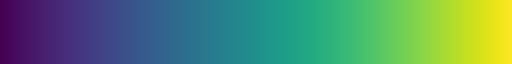

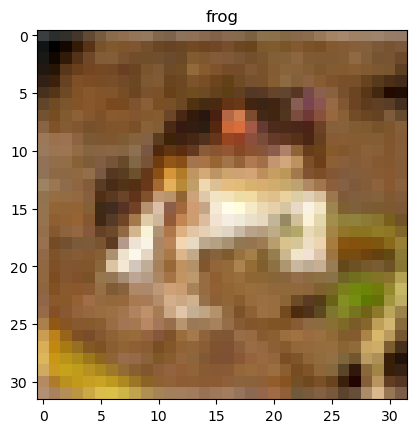

In [58]:
label_name = meta_data['label_names'] # label names

image = batch_1_data['data'][0]       # take first image

label = batch_1_data['labels'][0]     # take first image label index

image = image.reshape(3,32,32)        # Reshape the image

image = image.transpose(1,2,0)        # Transpose the image

plt.imshow(image)                     # Display the image
plt.title(label_name[label])
plt.get_cmap()

#### Lets do some affine transformations on our image for fun

In [46]:
red_channel = image[:,:, 0]
green_channel = image[:,:, 1]
blue_channel = image[:,:, 2]

Note that white means high amount of red, green, or blue (close to 255). Darks mean very little red, green, or blue (close to zero) 

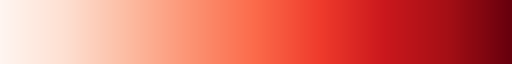

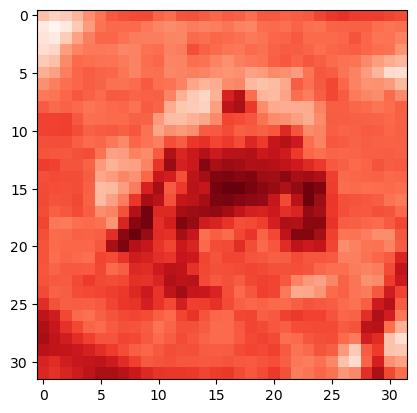

In [56]:
plt.imshow(red_channel, cmap='Reds')
plt.get_cmap(name='Reds')

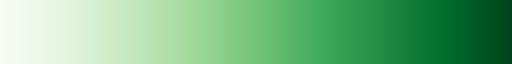

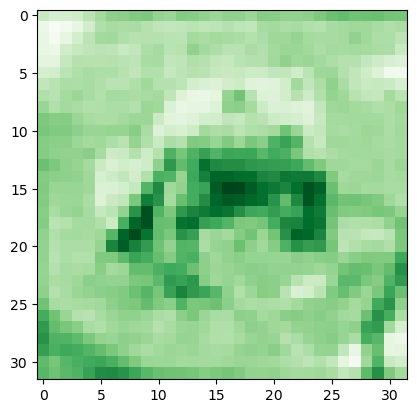

In [57]:
plt.imshow(green_channel, cmap='Greens')
plt.get_cmap(name='Greens')

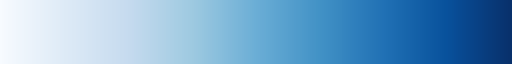

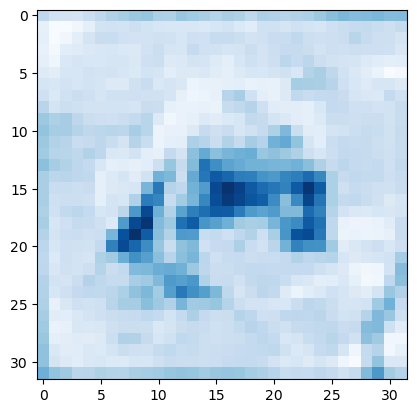

In [59]:
plt.imshow(blue_channel, cmap='Blues')
plt.get_cmap(name='Blues')

In [18]:
image.shape

(32, 32, 3)

(32, 32, 3)

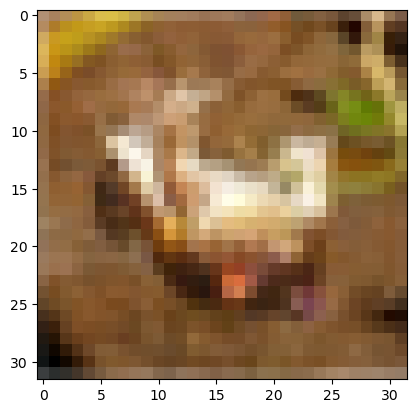

In [19]:
image_flipped = np.flip(image, axis=0)
plt.imshow(image_flipped)
image_flipped.shape

(32, 32, 3)

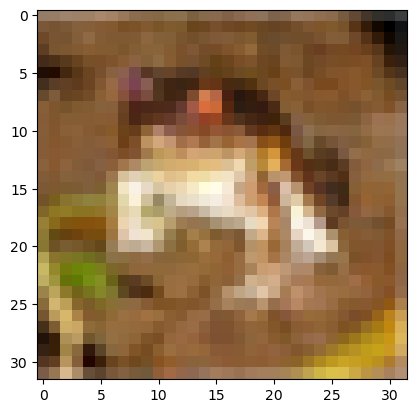

In [20]:
image_mirrored = np.flip(image, axis=1)
plt.imshow(image_mirrored)
image_mirrored.shape

(32, 32, 3)

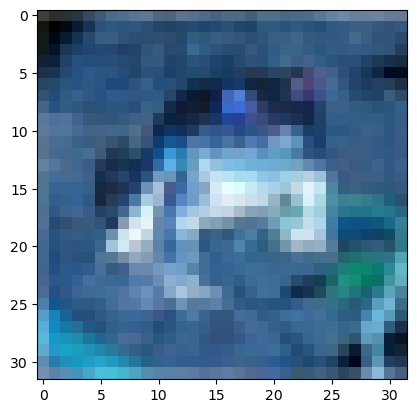

In [21]:
image_color_noblue = np.flip(image, axis=2)
plt.imshow(image_color_inverted)
image_color_inverted.shape

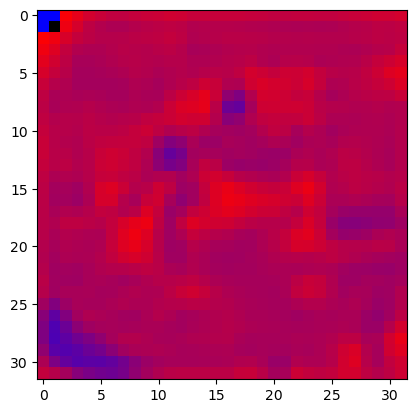

In [23]:
t = abs(image_color_inverted - image)
plt.imshow(t)

array([[  4,   0, 252],
       [  2,   0, 254],
       [249,   0,   7],
       [230,   0,  26],
       [210,   0,  46],
       [200,   0,  56],
       [192,   0,  64],
       [191,   0,  65],
       [196,   0,  60],
       [200,   0,  56],
       [202,   0,  54],
       [207,   0,  49],
       [205,   0,  51],
       [198,   0,  58],
       [198,   0,  58],
       [198,   0,  58],
       [198,   0,  58],
       [198,   0,  58],
       [196,   0,  60],
       [195,   0,  61],
       [192,   0,  64],
       [192,   0,  64],
       [194,   0,  62],
       [194,   0,  62],
       [193,   0,  63],
       [193,   0,  63],
       [196,   0,  60],
       [199,   0,  57],
       [202,   0,  54],
       [206,   0,  50],
       [206,   0,  50],
       [211,   0,  45]], dtype=uint8)

### Viewing Multiple Images From CIFAR-10 Dataset

We visualize some randomly selected images from the training data batch.

In [ ]:
images_np = batch_1_data['data']
images_np.shape

In [ ]:
# reshape and transpose data into PLT format
images_np = images_np.reshape(len(images_np), 3, 32, 32)
images_np.shape

In [ ]:
images_np_plt_format = images_np.transpose(0, 2, 3, 1)
images_np_plt_format.shape

# Baby's first Neural Network

In [ ]:
# Create input_tensor with three features
input_tensor = torch.tensor(
    [[0.3371, 0.4547, -0.2356]]
)

# linear layer takes an input, applies a linear function, and returns output
# in_features: num layers input
# out_features: num layers output
linear_layer = nn.Linear(in_features=3, out_features=2)

output = linear_layer(input_tensor)
print(output)


In [ ]:
# Define transformations to apply to the dataset
transform = transforms.Compose([
    transforms.ToTensor(),           # Convert images to tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the pixel values
])

# get CIFAR10 from local directory
dataset = torchvision.datasets.CIFAR10(root='./cifar-10', train=True, transform=transform, download=False)